## Exploratory Data Analysis Project

### Project Description:
We received a cvs file, with data from car sale application, collected over the last few years.
The data included the relevant cars information, date posting the ad, requested price & how long the ad was on the site.
We were asked to study the data and determine which factors influence the price of vehicle.

The method:
First step is the data preprocessing. After understanding the data general information and main issues, we try to solve them. taking care of null values was done, using several methods.
changing data type as required, and adding some new columns to make the analysis easy.
Next main step was to learn the data distribution and determine its outliers, by using exploratory data analysis tools.
we had to define new data set, with only the 'normal' cars. we cut the outliers and saved them in different df.
Last step: calculate and visualize the correlations between the price and main car parameters, using different graphs and matrix and getting into colclusions.

In [1]:
!pip install -U seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Open the data file and study the general information

store it in the variable "vehicles_data"

In [3]:
try:
    vehicles_data = pd.read_csv('/datasets/vehicles_us.csv')
except:
    vehicles_data = pd.read_csv('vehicles_us.csv')

Study the general information:

In [4]:
vehicles_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,23/06/2018,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,19/10/2018,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,07/02/2019,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,22/03/2019,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,02/04/2019,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,20/06/2018,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,27/12/2018,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,07/01/2019,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,16/07/2018,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,15/02/2019,17


In [5]:
vehicles_data.info()
vehicles_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
vehicles_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusions:  The file contains 51,525 rows of data.

There are null values in x column: model_year, cylinders, odometer, paint_color and is_4wd.

some of them are critical for our analysis, so we will have to find the way to fill them.


## Data preprocessing

Main goal: Identify gas station chains for app marketing.

Selection criteria: Chains with long visit times.

Problem: Averages calculated from raw data are misleading due to anomalies in the dataset (really short/long time_spent values).

Current goal: Understand anomalies so we can address them appropriately and better estimate average visit time per chain.

I can see there are 51,525 rows in our datafile. some of the columns have missing values:
- Model_year
- cylinders
- odometer
- paint_color
- is_4wd

I will exemine each of them and decide which is the best way to fill the missing values.   
3.1. starting with is_4wd

In [7]:
vehicles_data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

25,572 rows has the value of 1, which means 4wd=Yes. It is reasonable to assume that the missing values are 4wd=No which is 0.
so I will replace the missing values with 0.

In [8]:
vehicles_data['is_4wd'].fillna(0, inplace=True)

In [9]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


3.2. Now, lets take care of the 'cylinders' missing values

In [10]:
len(vehicles_data[vehicles_data['cylinders'].isnull()])

5260

There are 5260 rows with NaN value in cylinders column. This column is important for the study, so I have to fill it.
I want to find which is the most common cylinders number for each pair of model & type, and assign it to this group's missing values.
I tried this way, and spent a lot of time on it, but at the  end I found there are some groups of model & types that have all null values. so, I changes my method, and used transform(), applying the median cylinder to the empty values.

In [11]:
vehicles_data.groupby('model')['cylinders'].median()

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

In [12]:
vehicles_data['cylinders'] = vehicles_data.cylinders.fillna(
                              vehicles_data.groupby('model')['cylinders'].transform('median')
)

len(vehicles_data[vehicles_data['cylinders'].isnull()])

0

Odd cylinders are not real. I decided to substruct 1 from odd numbers, because I assume the most common values are the lower ones, and the higher values raised the mean but they are not the most common.

In [13]:
#vehicles_data['cylinders'] = vehicles_data['cylinders'].astype('int')
#vehicles_data['cylinders'][vehicles_data['cylinders']%2 != 0] = vehicles_data['cylinders'] -1
#vehicles_data['cylinders'].value_counts()

3.3. Fill missing values in 'model_year',by applying the meadian model_year for each model (my hypothesis is that each model is relevant for specific years, so the median will best represents the real model_year).

In [14]:
vehicles_data['model_year'] = vehicles_data.model_year.fillna(
                              vehicles_data.groupby('model')['model_year'].transform('median')
)

3.4. Fill the missing values in 'odometer' with the mean odometer for the same group of 'model' & 'model year'. 

since we have the 'model year' allready filled, I assume that the most close evaluation for car's mileage, 

is its age (model year) and model (assuming different purpose and use per model). 

In [15]:
vehicles_data['odometer'] = vehicles_data.odometer.fillna(
                            vehicles_data.groupby(['model_year','model'])['odometer'].transform('mean'))

vehicles_data.isnull().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer          83
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

83 rows are left with NaN odometer, because all their group raws were null.
I will fill them with the mean odometer calculated by model_year only

In [16]:
vehicles_data['odometer'] = vehicles_data.odometer.fillna(
                            vehicles_data.groupby('model_year')['odometer'].transform('mean'))
vehicles_data[vehicles_data['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,18/11/2018,59


Now there is only 1 row left with null odometer. It's a '1929 ford f-150'. This specific car is very unique, an antique, so it will not be very representing in our analysis. I will drop it using its index '45694'.

In [17]:
vehicles_data = vehicles_data.drop(labels=45694, axis=0)

In [18]:
vehicles_data[vehicles_data['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


3.5. Regarding the 'color' null values - since we can't evaluate the color of a car by any of the parameters, we will fill the null values with 'other'.

In [19]:
vehicles_data['paint_color'].fillna('other',inplace=True)
vehicles_data['paint_color'].value_counts()

white     10029
other      9267
black      7692
silver     6243
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

3.6. Convert the data to the required types

In [20]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51524 non-null  int64  
 1   model_year    51524 non-null  float64
 2   model         51524 non-null  object 
 3   condition     51524 non-null  object 
 4   cylinders     51524 non-null  float64
 5   fuel          51524 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51524 non-null  object 
 8   type          51524 non-null  object 
 9   paint_color   51524 non-null  object 
 10  is_4wd        51524 non-null  float64
 11  date_posted   51524 non-null  object 
 12  days_listed   51524 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


@model_year - should be converted to integer, model year is always a whole number.

@cylinders - are also always a whole number (an odd number!)

@odometer - should be converted to integer, since its always a whole number.

@is_4wd - has boolean values 1/0, and could be converted to bool

@date_posted - should be converted into 'datetime' type.

@days_listed - can be converted into int32, since it containes just small numbers.

In [23]:
vehicles_data['model_year'] = vehicles_data['model_year'].astype('int32')
vehicles_data['cylinders'] = vehicles_data['cylinders'].astype('int32')
vehicles_data['odometer'] = vehicles_data['odometer'].astype('int32')
vehicles_data['is_4wd'] = vehicles_data['is_4wd'].astype('bool')
vehicles_data['date_posted'] = pd.to_datetime(vehicles_data['date_posted'],format='%d/%m/%Y')
vehicles_data['days_listed'] = vehicles_data['days_listed'].astype('int32')

In [24]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int32         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int32         
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  int32         
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  bool          
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(4), int64(1), object(6)
memory usage: 4.4+ MB


### Done!

## Calculate and add columns:

4.1. Add day of the week, month, and year the ad was placed

In [25]:
vehicles_data['week_day_posted'] = pd.DatetimeIndex(vehicles_data['date_posted']).weekday
vehicles_data['month_posted'] = pd.DatetimeIndex(vehicles_data['date_posted']).month
vehicles_data['year_posted'] = pd.DatetimeIndex(vehicles_data['date_posted']).year

4.2. Add the vehicle's age (in years) when the ad was placed

to calculate it I will substract 'model_year' from 'year_posted'

In [26]:
vehicles_data['car_age_posted'] = (vehicles_data['year_posted'] - vehicles_data['model_year'] + 1)

4.3. Add the vehicle's average mileage per year

I will calculate it by dividing 'odometer' by 'car_age_posted'

In [27]:
vehicles_data['avg_mileage'] = vehicles_data['odometer']//vehicles_data['car_age_posted']  
vehicles_data[vehicles_data['avg_mileage'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day_posted,month_posted,year_posted,car_age_posted,avg_mileage


NaN values:

There are 2 rows with average mileage of NaN. this happend because they have 0 odometer and 0 car age.

I will fill these null values with 0

Infinite values:

There are rows where the calculated car_age_posted is 0, which made the calculated average_mileage = inf.

I will update these rows car_age_posted to 1, and calculate average_mileage again.

In [28]:
vehicles_data['avg_mileage'].describe()

count     51524.000000
mean      14612.563815
std        8791.306700
min           0.000000
25%        9765.000000
50%       13272.000000
75%       17760.000000
max      373200.000000
Name: avg_mileage, dtype: float64

In [29]:
#vehicles_data['avg_mileage'].fillna(0,inplace=True)
#vehicles_data['car_age_posted'][vehicles_data['car_age_posted'] == 0] = 1
#vehicles_data['avg_mileage'] = vehicles_data['odometer']//vehicles_data['car_age_posted']
#vehicles_data['avg_mileage'] = vehicles_data['avg_mileage'].astype('int32')

4.4. Replace condition column values with a numeric scale:

In [30]:
vehicles_data['condition'].replace(['new','like new','excellent','good','fair','salvage'],[5 ,4, 3, 2, 1, 0],inplace=True)

## Carry out exploratory data analysis

1. Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, condition

2. Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame.

Current goal: Understand anomalies so we can address them appropriately and better estimate each factor impact on the price.
### Price

Text(0, 0.5, 'Quantity')

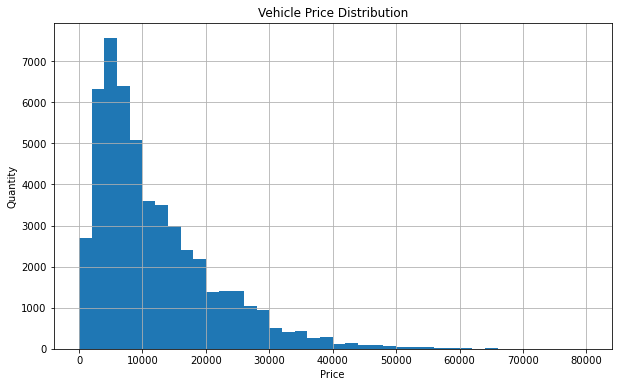

In [31]:
vehicles_data.hist('price', bins=40, range = (0,80000), figsize =(10,6));
plt.title('Vehicle Price Distribution')
plt.xlabel('Price')
plt.ylabel('Quantity')

The 'price' histogram has a peak between 20,000 and 80,000, and inside it a peak at 40,000. it has a long positive tail: there are less rows as the price gets higher.

In order to learn more about the high price ads we will take a closer look on them by ploting a smaller part of the data:

Text(0, 0.5, 'Quantity')

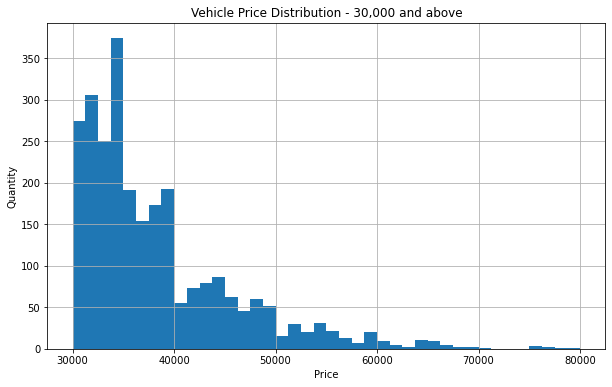

In [32]:
vehicles_data.hist('price', bins=40, range = (30000,80000), figsize =(10,6));
plt.title('Vehicle Price Distribution - 30,000 and above')
plt.xlabel('Price')
plt.ylabel('Quantity')

In [33]:
vehicles_data.query('price > 50000')['price'].count()

227

We can see that at price above 50,000 we have only 227 cases, which is negligible . we can call it outliers.

We will remove these outliers and store them in a separate DataFrame.

From now on, we will work on the filtered data df: 'normal_data'

In [34]:
high_price = vehicles_data.query('price > 50000')
normal_data = vehicles_data.query('price <= 50000')

### Car age when the ad was placed

Text(0, 0.5, 'Quantity')

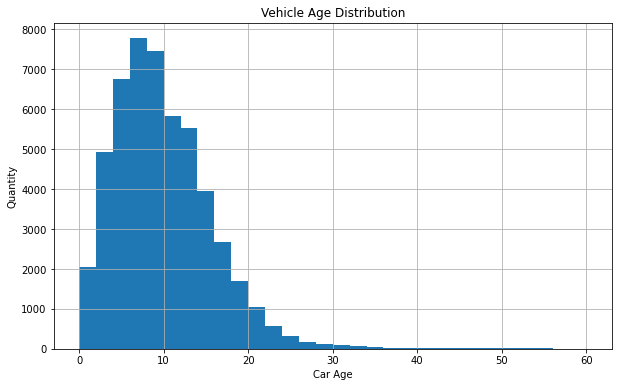

In [35]:
normal_data.hist('car_age_posted', bins=30, range = (0,60), figsize =(10,6));
plt.title('Vehicle Age Distribution')
plt.xlabel('Car Age')
plt.ylabel('Quantity')

Here we can observe a peak between 2 and 10 years. There is a positive tail, and cars over 25 years old are quite rare.

In order to learn more about the old cars we will plot a smaller part of the data: ages 20-60

727

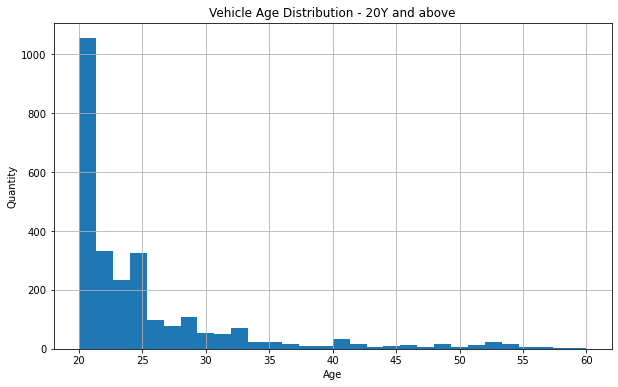

In [36]:
normal_data.hist('car_age_posted', bins=30, range = (20,60), figsize =(10,6));
plt.title('Vehicle Age Distribution - 20Y and above')
plt.xlabel('Age')
plt.ylabel('Quantity')
normal_data.query('car_age_posted > 25')['price'].count()

We can see in the graph that cars older than 25 years are very rare. There are only 727 cars at this group.
As outliers they may disrupt our analysis, since they behavior does not represnt the overall dependences.

We will remove these outliers and store them in a separate DataFrame

In [37]:
old_vehicles = normal_data.query('car_age_posted > 25')
normal_data = normal_data.query('car_age_posted <= 25')

### Mileage

Text(0, 0.5, 'Quantity')

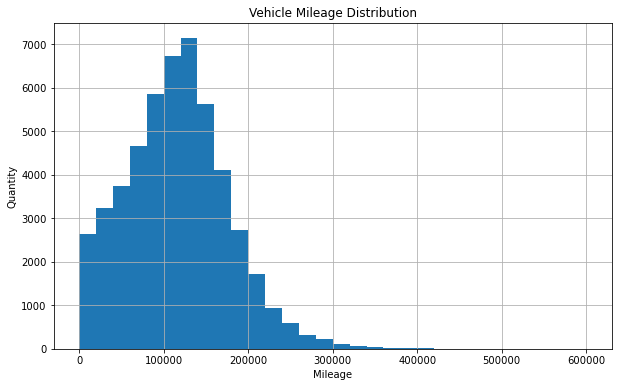

In [38]:
normal_data.hist('odometer', bins=30, range = (0,600000), figsize =(10,6));
plt.title('Vehicle Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Quantity')

odometer histogram has a peak between 20,000 and 180,000, and a very short tail after 250,000. 
we will take closer look at the population of 200,000 and above

Text(0, 0.5, 'Quantity')

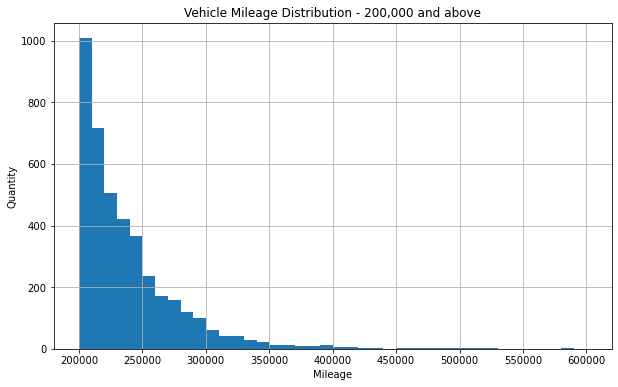

In [39]:
normal_data.hist('odometer', bins=40, range = (200000,600000), figsize =(10,6));
plt.title('Vehicle Mileage Distribution - 200,000 and above')
plt.xlabel('Mileage')
plt.ylabel('Quantity')

Outliers can be determined as above 300,000. we can see that there are relatively many rows between 250,000 and 300000  

How many?

In [40]:
#normal_data.query('odometer > 250000 & odometer < 300000')['price'].count()
normal_data.query('odometer > 300000')['price'].count()

275

There are 722 cases between 250,000 and 300,000 and 275 cases above 300,000. 
so I decide to set the line at 250,000, so it will have more impact on the normalized data.

In [41]:
high_mileage = normal_data.query('odometer > 250000')
normal_data = normal_data.query('car_age_posted <= 250000')

### Cylinders

Text(0, 0.5, 'Quntity')

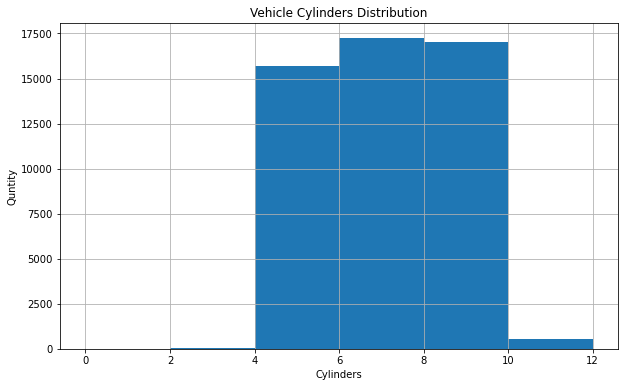

In [42]:
normal_data.hist('cylinders', bins=6, range = (0,12), figsize =(10,6));
plt.title('Vehicle Cylinders Distribution')
plt.xlabel('Cylinders')
plt.ylabel('Quntity')

We can see that most of the cars have 4, 6 or 8 cylinders. 
Lets check how many cars have 2, 10 or 12 cylinders?

In [43]:
normal_data['cylinders'].value_counts()

6     17239
8     17035
4     15417
10      549
5       294
3        34
12        2
Name: cylinders, dtype: int64

2 and 12 cylinders are defiantly rare, but since there are only 6 categories, I don't see how they can spoil our analysis, furthermore, they can add interesting information.

### Condition

Text(0, 0.5, 'Quantity')

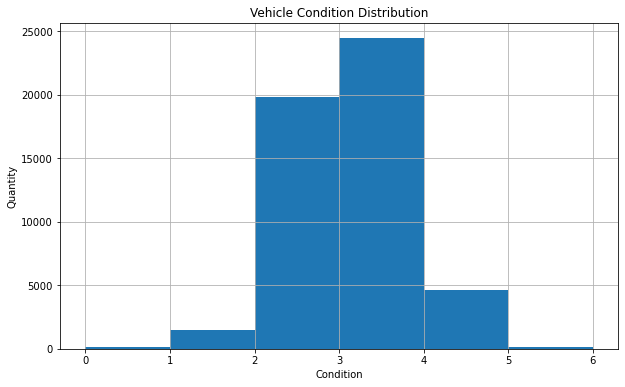

In [44]:
normal_data.hist('condition', bins=6, range = (0,6), figsize =(10,6));
plt.title('Vehicle Condition Distribution')
plt.xlabel('Condition')
plt.ylabel('Quantity')

In [45]:
normal_data['condition'].value_counts()

3    24432
2    19778
4     4639
1     1493
5      119
0      109
Name: condition, dtype: int64

Most of the cars are in 'excellent' or 'good' condition. there are many 'like new' and less 'fair' condition.

Same as with cylinders, since condition is a categorial parameter, I don't think it's good to drop the outliers ('new' and 'salvage').

### We will use the filtered data to plot new histograms. we will compare them with the earlier histograms.

Text(0.5, 0, 'Price')

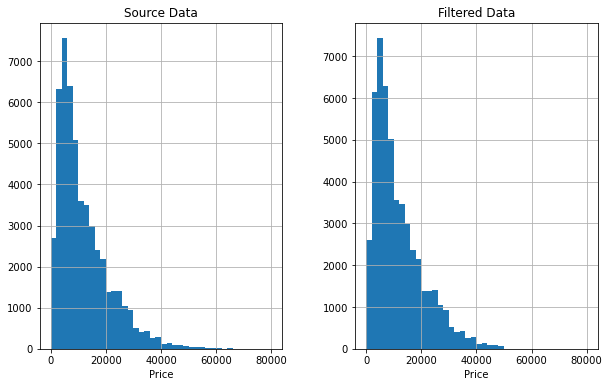

In [46]:
#fig, axes = plt.subplots(1, 2)
fig,axes=plt.subplots(ncols=2,figsize=(10,6))

ax = vehicles_data.hist('price', bins=40, range = (0,80000), ax=axes[0]);

ax = normal_data.hist('price', bins=40, range = (0,80000), ax=axes[1]);

axes[0].set_title("Source Data")
axes[1].set_title("Filtered Data")
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Price')

### Conclusion: In the left is the original data. The graphs look similar, with the same distribution


Text(0.5, 0, 'Car Age')

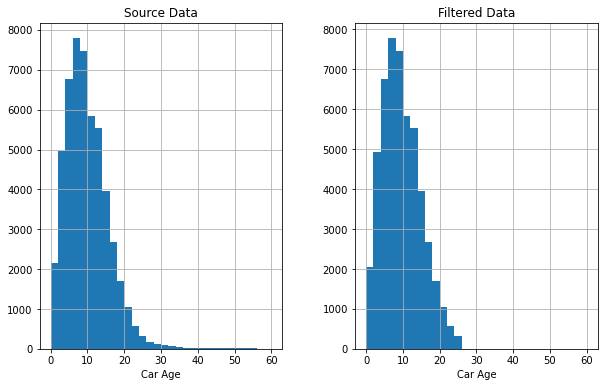

In [47]:
fig,axes=plt.subplots(ncols=2,figsize=(10,6))
vehicles_data.hist('car_age_posted', bins=30, range = (0,60), figsize =(10,6), ax=axes[0]);
normal_data.hist('car_age_posted', bins=30, range = (0,60), figsize =(10,6), ax=axes[1]);

axes[0].set_title("Source Data")
axes[1].set_title("Filtered Data")
axes[0].set_xlabel('Car Age')
axes[1].set_xlabel('Car Age')

### Conclusion: In the left is the original data. The graph looks quite the same, except for the anomalies at the high age 

Text(0.5, 0, 'Odometer')

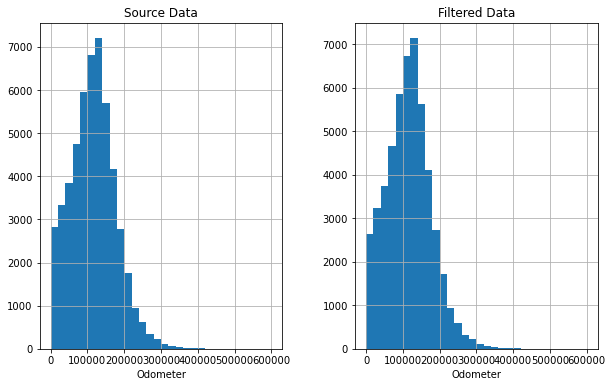

In [48]:
fig,axes=plt.subplots(ncols=2,figsize=(10,6))
vehicles_data.hist('odometer', bins=30, range = (0,600000), figsize =(10,6), ax=axes[0]);
normal_data.hist('odometer', bins=30, range = (0,600000), figsize =(10,6), ax=axes[1]);

axes[0].set_title("Source Data")
axes[1].set_title("Filtered Data")
axes[0].set_xlabel('Odometer')
axes[1].set_xlabel('Odometer')

### Conclusion: In the left is the original data. The graphs have the same distribution and almost same values. we can see at the new graph on the right, less numbers in the 0 bar

Text(0.5, 0, 'Cylinders')

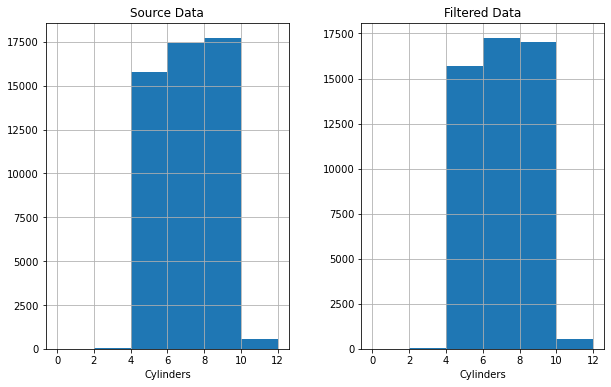

In [49]:
fig,axes=plt.subplots(ncols=2,figsize=(10,6))
vehicles_data.hist('cylinders', bins=6, range = (0,12), figsize =(10,6), ax=axes[0]);
normal_data.hist('cylinders', bins=6, range = (0,12), figsize =(10,6), ax=axes[1]);

axes[0].set_title("Source Data")
axes[1].set_title("Filtered Data")
axes[0].set_xlabel('Cylinders')
axes[1].set_xlabel('Cylinders')

### Conclusion: In the left is the original data. the graph are almost the same

Text(0.5, 0, 'condition')

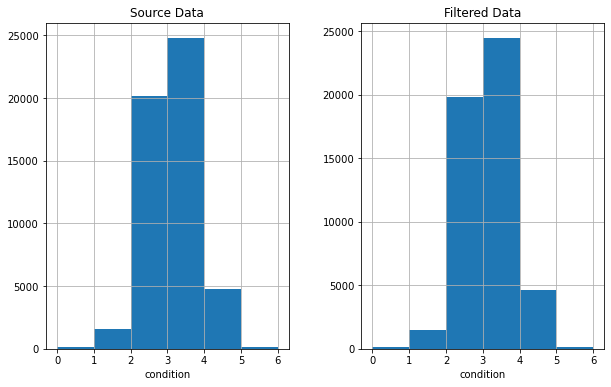

In [50]:
fig,axes=plt.subplots(ncols=2,figsize=(10,6))
vehicles_data.hist('condition', bins=6, range = (0,6), figsize =(10,6), ax=axes[0]);
normal_data.hist('condition', bins=6, range = (0,6), figsize =(10,6), ax=axes[1]);

axes[0].set_title("Source Data")
axes[1].set_title("Filtered Data")
axes[0].set_xlabel('condition')
axes[1].set_xlabel('condition')

#### Conclusion:  In the left is the original data. the graphs are almost the same

#### In general, we can say that the fact the graphs before and after the preprosessing are very simillar, means that we did good job and didn't spoil the data while removing the outliers

## Study how many days advertisements were displayed.

again, our goal is to understand anomalies so we can address them appropriately.

we will Calculate the mean and median number of days ads were displayed in order to describe the typical lifetime of an ad and determine the outliers.

Text(0, 0.5, 'Quantity')

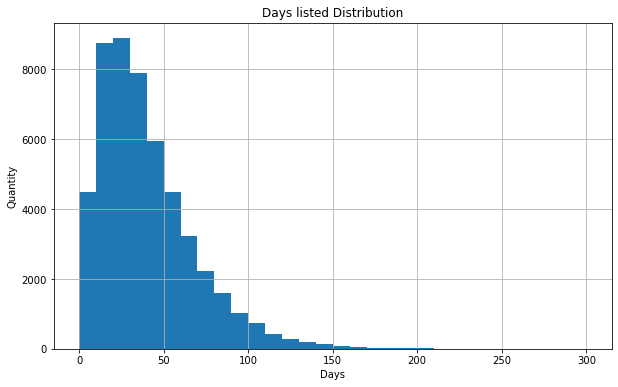

In [51]:
normal_data.hist('days_listed', bins=30, range = (0,300), figsize =(10,6));
plt.title('Days listed Distribution')
plt.xlabel('Days')
plt.ylabel('Quantity')

In [52]:
normal_data['days_listed'].agg(['mean', 'median'])

mean      39.540498
median    33.000000
Name: days_listed, dtype: float64

0.25    19.0
0.75    53.0
Name: days_listed, dtype: float64

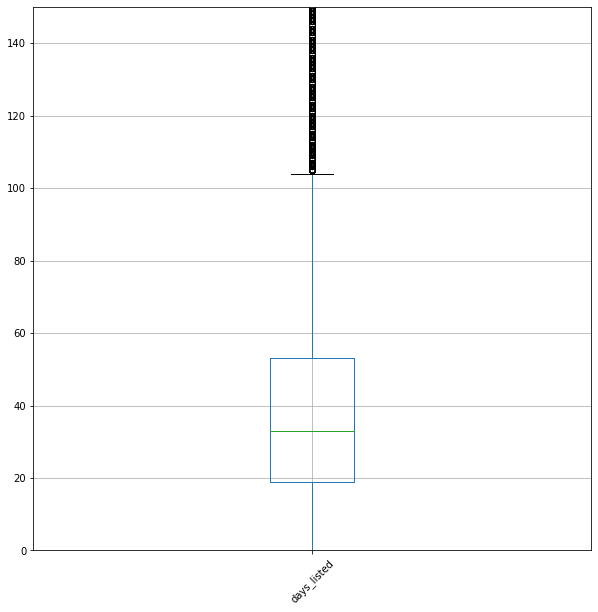

In [53]:
normal_data.boxplot(column='days_listed',fontsize = 10, rot = 45,grid = True,figsize = (10,10))
plt.ylim(0, 150)
normal_data['days_listed'].quantile([0.25,0.75])

Closer look at the typical ads:

Text(0, 0.5, 'Quantity')

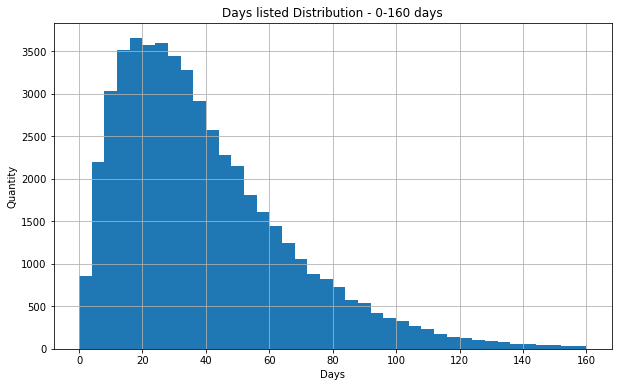

In [54]:
normal_data.hist('days_listed', bins=40, range = (0,160), figsize =(10,6));
plt.title('Days listed Distribution - 0-160 days')
plt.xlabel('Days')
plt.ylabel('Quantity')

### Conclusion:
The mean days ad was listed is 39 and the median is 33, which means that a tail of long time listed ads is pulling the mean up.

Half of the ads (Q2 & Q3) are listed between 19 and 53 days and the upper whisker ends around 100 days.

we can say that a typical ad is listed between 2 and 80 days. quickly removed ads are less then 2 days and abnormaly long listed ads are more then 100 days. 

## Analyze the number of ads and the average price for each type of vehicle.
I order to find the most popular vehicle types, we will plot a graph showing the dependence of the number of ads on the vehicle
type. 

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, SUV to wagon
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (mean, price)   13 non-null     float64
 1   (count, price)  13 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 312.0+ bytes


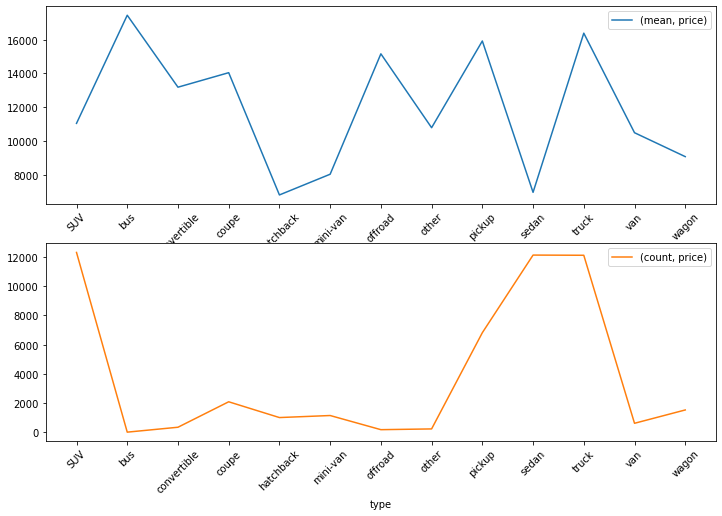

In [55]:
#labels = ['SUV','bus','convertible','coupe','hatchback','mini-van','offroad','other','pickup','sedan','truck','van','wagon']

tmp = normal_data.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])

axes = tmp.plot(subplots=True, figsize=(12, 8), sharex=False);

for ax in axes:
    ax.set_xticks(range(len(tmp)))
    ax.set_xticklabels(tmp.index.tolist(), rotation=45);

tmp.info()

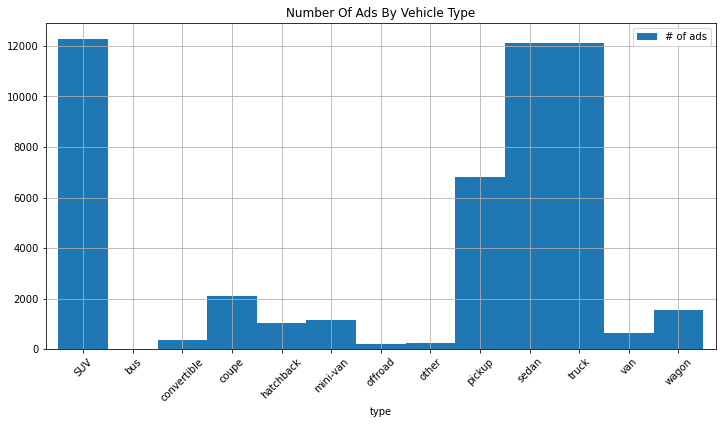

In [56]:
type_groupby = normal_data.groupby(by ='type',axis = 0,sort=True)

pd.DataFrame(type_groupby.size(), columns=['# of ads']).plot(
    kind='bar',figsize = (12,6),grid=True,rot=45,width = 1,title = 'Number Of Ads By Vehicle Type',tick_label='# of ads');

In [57]:
type_groupby['price'].count()

type
SUV            12292
bus               23
convertible      358
coupe           2096
hatchback       1019
mini-van        1158
offroad          192
other            243
pickup          6812
sedan          12112
truck          12099
van              628
wagon           1538
Name: price, dtype: int64

### Conclusion:
The two types with the greatest number of ads are 'SUV' and 'sedan', both have around 12,000 ads

## What factors impact the price most? 
### We will study whether the price depends on each one of the variables and how

age, mileage, condition, transmission type, and color.

In [58]:
normal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50570 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            50570 non-null  int64         
 1   model_year       50570 non-null  int32         
 2   model            50570 non-null  object        
 3   condition        50570 non-null  int64         
 4   cylinders        50570 non-null  int32         
 5   fuel             50570 non-null  object        
 6   odometer         50570 non-null  int32         
 7   transmission     50570 non-null  object        
 8   type             50570 non-null  object        
 9   paint_color      50570 non-null  object        
 10  is_4wd           50570 non-null  bool          
 11  date_posted      50570 non-null  datetime64[ns]
 12  days_listed      50570 non-null  int32         
 13  week_day_posted  50570 non-null  int64         
 14  month_posted     50570 non-null  int64

### Separate columns into smaller dataframes to perform visualization
1.Numerical data

2.Categorical data

In [59]:
data_quant = normal_data.loc[:, ['type','price','car_age_posted','odometer','condition']]
data_cat = normal_data.loc[:, ['type','price','transmission','paint_color']]
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50570 entries, 0 to 51524
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          50570 non-null  object
 1   price         50570 non-null  int64 
 2   transmission  50570 non-null  object
 3   paint_color   50570 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


3.Then we will create two slices of the data for the vehicles type 'SUV' and for 'sedan'

For the categorical variables, the catgories must have at least 50 ads, so we will slice and filter the data according the quantities we have in the sub-groups, by color and by transmission.

In [60]:
#Quantitative variables
suv_data_q = data_quant[data_quant['type'] == 'SUV']
sedan_data_q = data_quant[data_quant['type'] == 'sedan']

#Categorical variables
#Slice data by type, and filter groups of colors with at least 50 rows
color_groups = data_cat.pivot_table(index=['type','paint_color'], aggfunc=len)

suv_color_50 = color_groups.query('type == "SUV" & price >= 50')
sedan_color_50 = color_groups.query('type == "sedan" & price >= 50')

suv_data_c = data_cat.query('type == "SUV" & paint_color in @suv_color_50.index.get_level_values("paint_color")')
sedan_data_c = data_cat.query('type == "sedan" & paint_color in @sedan_color_50.index.get_level_values("paint_color")')

#Slice data by type, and filter groups of transmission type with at least 50 rows
trans_groups = data_cat.pivot_table(index=['type','transmission'], aggfunc=len)

suv_trans_50 = trans_groups.query('type == "SUV" & price >= 50')
sedan_trans_50 = trans_groups.query('type == "sedan" & price >= 50')

suv_data_t = data_cat.query('type == "SUV" & transmission in @suv_trans_50.index.get_level_values("transmission")')
sedan_data_t = data_cat.query('type == "sedan" & transmission in @sedan_trans_50.index.get_level_values("transmission")')

### Finally! Lets see what factors impact the price and how?

First we will exemine the SUV group
Categorical variables (paint color and transmission type), we will plot box-and-whisker charts

,type,price,transmission
paint_color,,,
black,2200,2200,2200
blue,1042,1042,1042
brown,367,367,367
custom,307,307,307
green,433,433,433
grey,1177,1177,1177
orange,84,84,84
other,2215,2215,2215
red,892,892,892


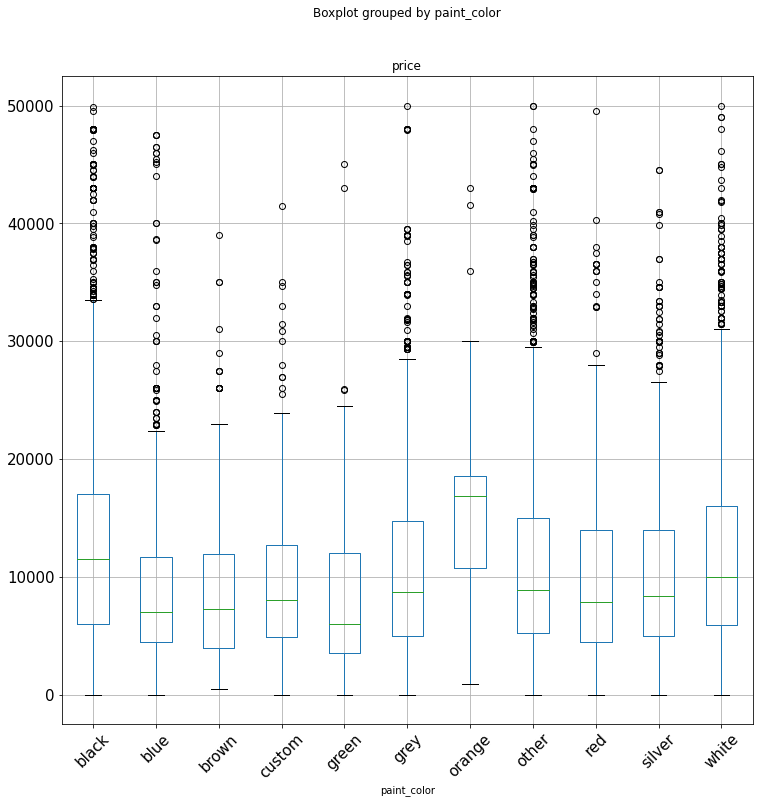

In [61]:
suv_data_c.boxplot(column='price',by = 'paint_color',fontsize = 15, rot = 45,grid = True,figsize = (12,12));
suv_data_c.groupby('paint_color').count()

We can see that the median price for black and orange cars is higher then the rest, and is above 10,000. it can be explained by the fact that cars in these colors may be unique and expensive cars (black cars are known as prestigious).
on the other hand, green cars have the lowest median. I guess its because its hard to sell this color...

,type,price,paint_color
transmission,,,
automatic,11657,11657,11657
manual,476,476,476
other,159,159,159


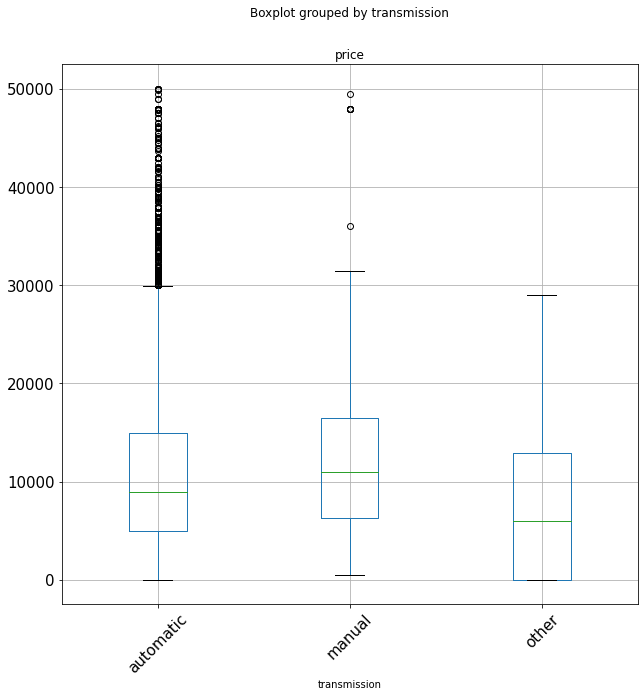

In [62]:
suv_data_t.boxplot(column='price',by = 'transmission',fontsize = 15, rot = 45,grid = True,figsize = (10,10));
suv_data_t.groupby('transmission').count()

Automatic cars are the majority, and probebly represents all types of cars. manual cars are more rare and their price range at higher levels. I assume its because manual cars tend to be unique models, and being so their are more expensive

For the quantitative variables, we will use scatterplots

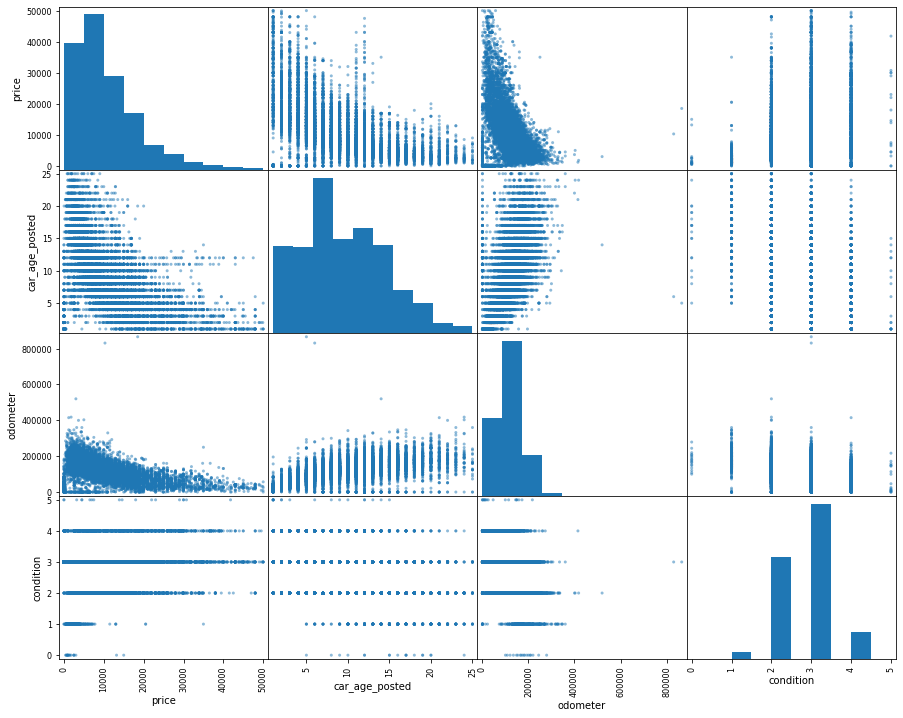

In [63]:
pd.plotting.scatter_matrix(suv_data_q, figsize=(15,12));

1. We can see a correlation between the age of the car and its price. its obvious that as the car gets older, its price gets down.

2. There is a strong linear correlation between the car's mileage and its price. which is also obvious.

3. The condition of the car effect the price, off course. but it seems that the prices for the middle conditions 2,3 and 4 are at the same levels. and cars in 'new' condition even get lower prices. maybe its because 'condition' is subjective measure, so the seller can categorize his car as he likes, but the customer will judge the condition himself and pay upon the real condition.

We will plot heatmap correlation graph for the quantitative variables, to see how they are correlated with the price

In [64]:
suv_data_q.describe()

,price,car_age_posted,odometer,condition
count,12292.000000,12292.000000,12292.000000,12292.000000
mean,11043.586560,9.412057,118564.421087,2.693134
std,8314.197465,5.026607,57896.577357,0.684481
min,1.000000,1.000000,0.000000,0.000000
25%,4999.000000,6.000000,80000.000000,2.000000
50%,8900.000000,9.000000,120000.000000,3.000000
75%,14991.000000,13.000000,155284.000000,3.000000
max,50000.000000,25.000000,866000.000000,5.000000


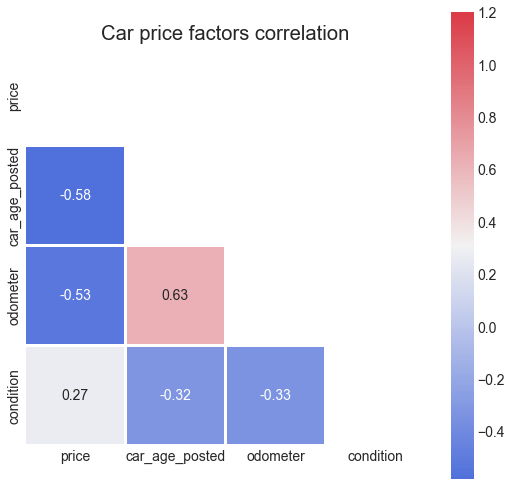

In [65]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = suv_data_q.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
suv_data_q, ax = plt.subplots(figsize=(8, 8))
plt.title('Car price factors correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2);

### Conclusion: the price is correlated negatively with the car's mileage (-0.53) and is in stronger correlation (-0.58) with the car's age.

The age and the mileage are also correlated to each other (0.63)

Now we will exemine the sedan group Categorical variables (paint color and transmission type), we will plot box-and-whisker charts

,type,price,transmission
paint_color,,,
black,1766,1766,1766
blue,1225,1225,1225
brown,259,259,259
custom,298,298,298
green,206,206,206
grey,1622,1622,1622
other,2180,2180,2180
red,940,940,940
silver,2053,2053,2053


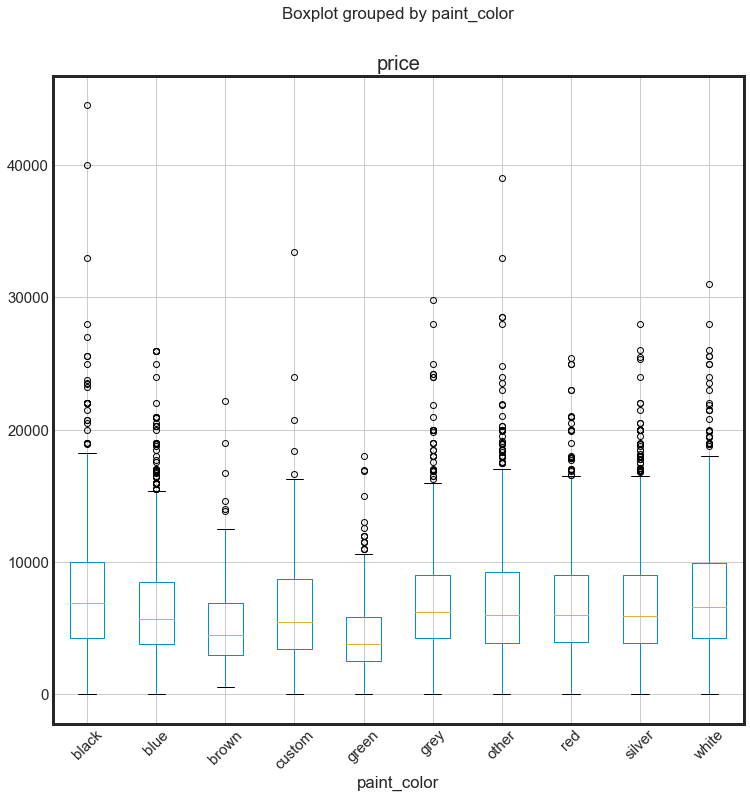

In [66]:
sedan_data_c.boxplot(column='price',by = 'paint_color',fontsize = 15, rot = 45,grid = True,figsize = (12,12));
sedan_data_c.groupby('paint_color').count()

Looking at the sedan cars, we can see different colors vs. price distribution. all the colors have median lower then 10,000. in general, the medians are not far from each other. green and brown cars have the lowest median price

,type,price,paint_color
transmission,,,
automatic,11390,11390,11390
manual,590,590,590
other,132,132,132


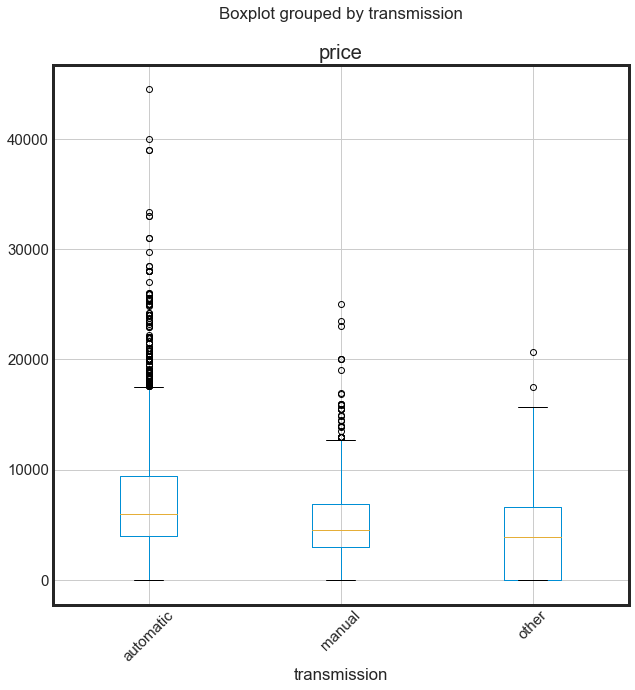

In [67]:
sedan_data_t.boxplot(column='price',by = 'transmission',fontsize = 15, rot = 45,grid = True,figsize = (10,10));
sedan_data_t.groupby('transmission').count()

Same result as with the SUV type - automatic cars are the major part, and gets lower price. manual cars get higher prices, and I believe its due to being special not only by the gear.

For the quantitative variables, we will use scatterplots

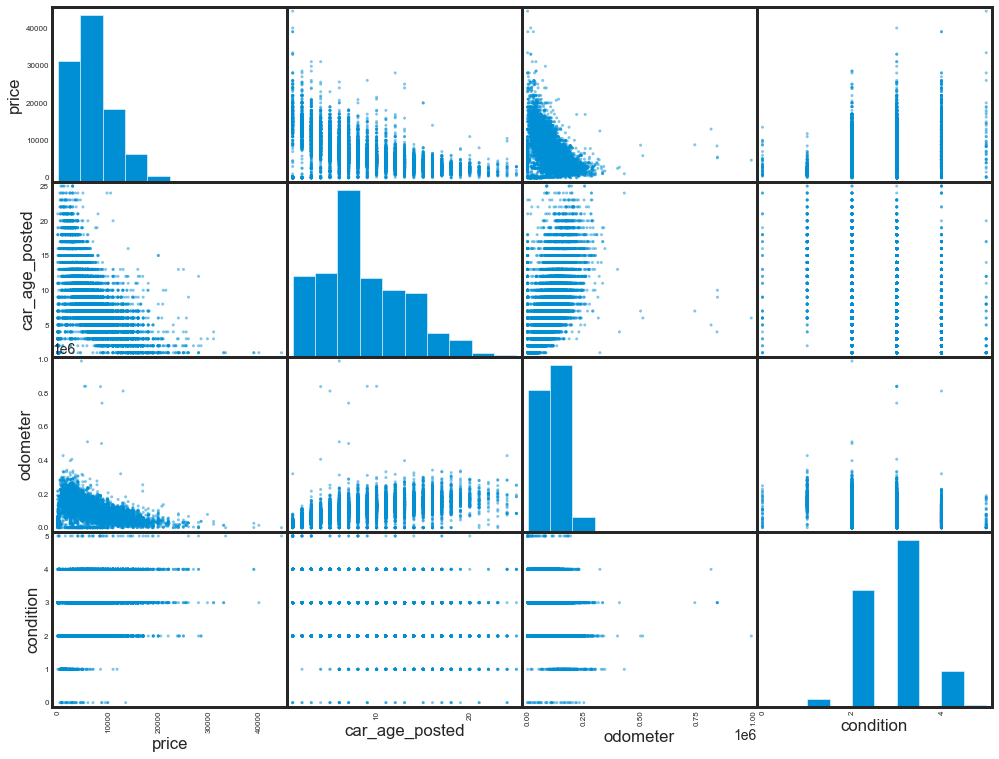

In [68]:
pd.plotting.scatter_matrix(sedan_data_q, figsize=(15,12));

1. We can see a negative correlation between the age of the car and its price. its obvious that as the car gets older, its price gets down.

2. As with the SUV cars, there is a correlation between the car's mileage and its price. the disribution here is more densed then we saw in the SUV. there is no line/pipe and most of the data isrelatively close to the 0. there is no upper tail in the new cars. I think it means that comparing to the SUV, the sedan price is less dispersed.

3. We can see that the impact of the car's condition is not linear. the price levels of the first 2 lowest condition levels is quite the same. there is a raise in the price level when going to the next levels 2 and 3, and then at condition levels 4 and 5 the price level decrese. strange... maybe the new cars are not so new... 

We will plot heatmap correlation graph for the quantitative variables, to see how they are correlated with the price

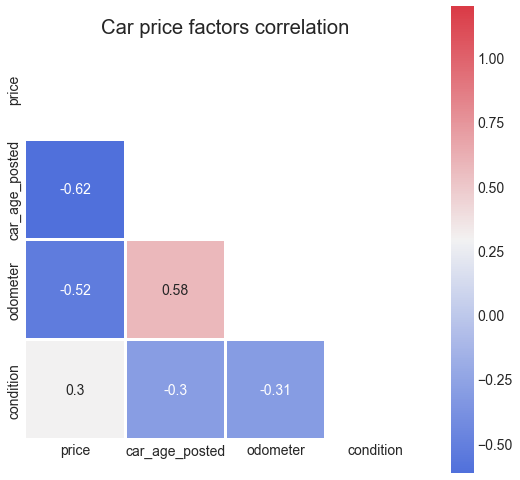

In [69]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = sedan_data_q.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
suv_data_q, ax = plt.subplots(figsize=(8, 8))
plt.title('Car price factors correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2);

### Conclusion: the price is correlated negatively with the car's mileage (-0.52) and is in stronger correlation (-0.62) with the car's age.
### The age and the mileage are also correlated to each other positively (0.58)

## overall conclusion:

This project included the conventional routine receiving a set of data, exemining it, pre-processing step, when we take care of missing values and duplicates.

In the next step, we determined for every variable its outliers. and created a clean data set by removing them.

We then analysed the clean data in order to find which factors have ipact on cars' price.

### The results: 
### values of car age and mileage show correlation with the car price. the price drop as the age and mileage rise.
### Car condition shows low correlation with the price, I tried to explain it by the fact that the seller may describe the car's condition far from the real condition. this measure is not objective as the age or mileage.
### Color - black cars show higher price level. I explain it with the hypothesis that black cars tend to be prestigious cars.
### transmission type - manual cars show higher price level. I also think its because manual cars usually belong to unique models, so their price is more expensive.  